<a href="https://colab.research.google.com/github/ksnugroho/teori-praktik-cv-part1/blob/main/Bagian_2_Bab_6_6_1_Augmentasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from torchvision import datasets
from imgaug import augmenters as iaa


def to_numpy(tensor):
    return tensor.cpu().detach().numpy()

# Mengunduh Dataset

In [ ]:
data_folder = './data/FMNIST'

train_data = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images, tr_targets = train_data.data, train_data.targets

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.4MB/s]


Extracting ./data/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FMNIST/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 301kB/s]


Extracting ./data/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FMNIST/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.59MB/s]


Extracting ./data/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FMNIST/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.43MB/s]

Extracting ./data/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FMNIST/FashionMNIST/raw



In [ ]:
import random
ix = random.randint(1, 60000)

# Gambar Asli

Text(0.5, 1.0, 'Original image')

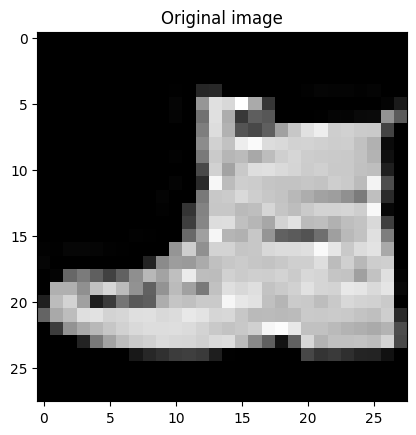

In [ ]:
plt.imshow(tr_images[ix], cmap='gray', vmin=0, vmax=255)
plt.title('Original image')

# Menggunakan Skala pada Gambar

Text(0.5, 1.0, 'Scaled image')

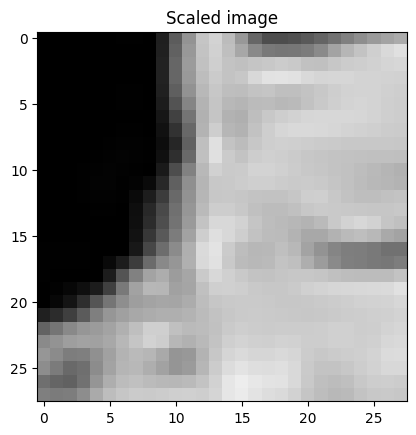

In [ ]:
aug = iaa.Affine(scale=2)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Scaled image')

# Menrapkan Translasi Gambar

Text(0.5, 1.0, 'Translated image by 10 pixels \n(right and bottom)')

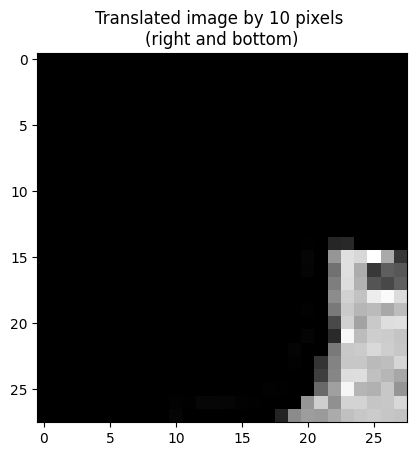

In [ ]:
# Menerapkan translasi sebesar 10 piksel
aug = iaa.Affine(translate_px=10)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Translated image by 10 pixels \n(right and bottom)')

Text(0.5, 1.0, 'Translation of 10 pixels \nacross columns and 2 pixels over rows')

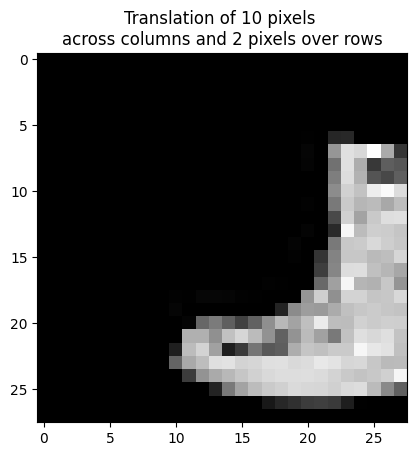

In [ ]:
# Translasi pada sumbu x dan y
aug = iaa.Affine(translate_px={'x':10,'y':2})
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Translation of 10 pixels \nacross columns and 2 pixels over rows')

# Distorsi Gambar (Shear)

Text(0.5, 1.0, 'Shear of image by 30 degrees')

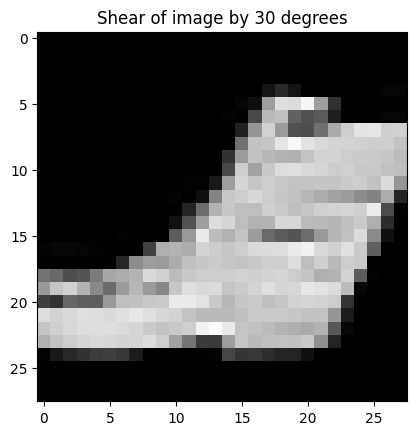

In [ ]:
aug = iaa.Affine(shear=30)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Shear of image by 30 degrees')

Text(0.5, 1.0, 'Shear of image by -30 degrees')

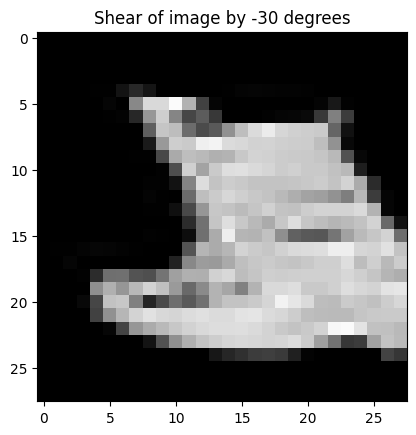

In [ ]:
aug = iaa.Affine(shear=-30)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Shear of image by -30 degrees')

# Rotasi Gambar

Text(0.5, 1.0, 'Rotation of image by 30 degrees')

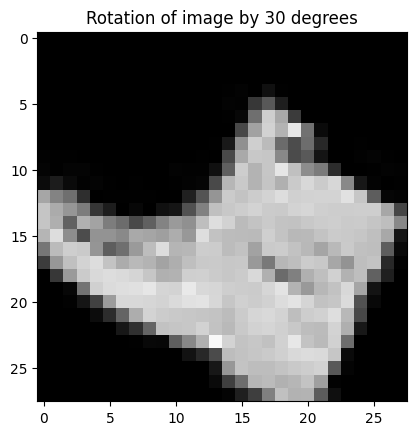

In [ ]:
aug = iaa.Affine(rotate=30)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Rotation of image by 30 degrees')

# Mengatasi Pemotongan Gambar saat Transformasi

Text(0.5, 1.0, 'Rotation of image by 30 degrees')

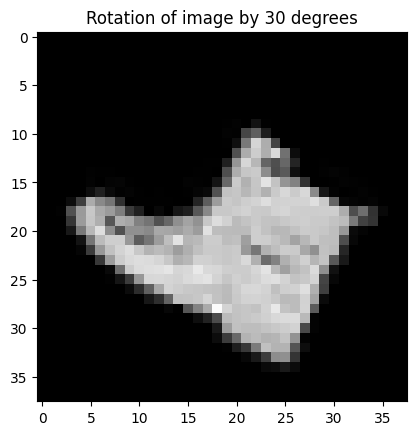

In [ ]:
aug = iaa.Affine(rotate=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Rotation of image by 30 degrees')

Text(0.5, 1.0, 'Rotation of image by 30 degrees with white padding')

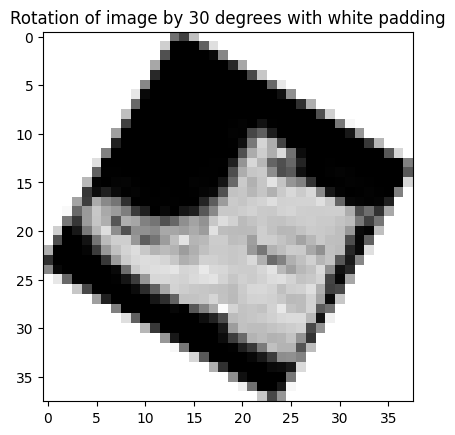

In [ ]:
aug = iaa.Affine(rotate=30, fit_output=True, cval=255)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Rotation of image by 30 degrees with white padding')

# Rotasi Acak

Text(0.5, 1.0, 'Random rotation between -45 and 45 degrees')

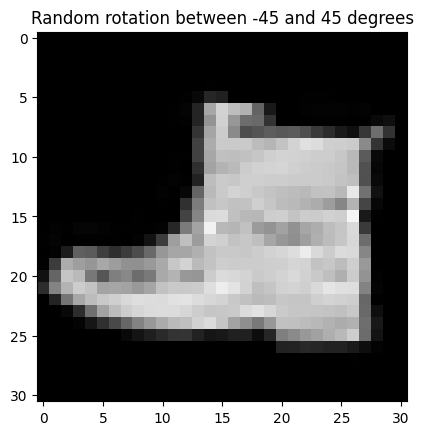

In [ ]:
aug = iaa.Affine(rotate=(-45, 45), fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Random rotation between -45 and 45 degrees')

# Mengubah Kecerahan

## Multiply

Text(0.5, 1.0, 'Pixels multiplied by 0.5')

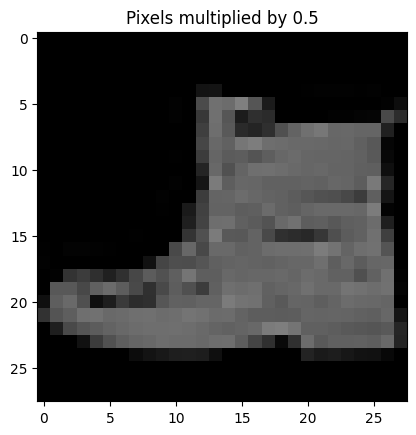

In [ ]:
aug = iaa.Multiply(0.5)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Pixels multiplied by 0.5')

## LinearContrast

Text(0.5, 1.0, 'Pixel contrast by 0.5')

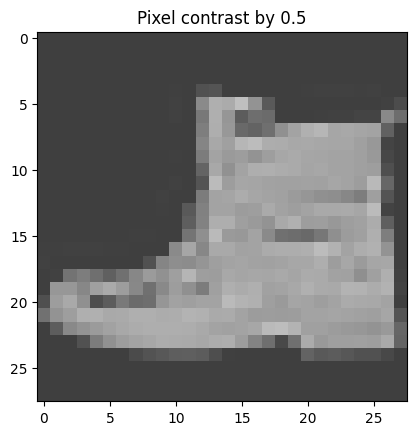

In [ ]:
aug = iaa.LinearContrast(0.5)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Pixel contrast by 0.5')

# Menambahkan Noise

## Dropout

Text(0.5, 1.0, 'Random 20% pixel dropout')

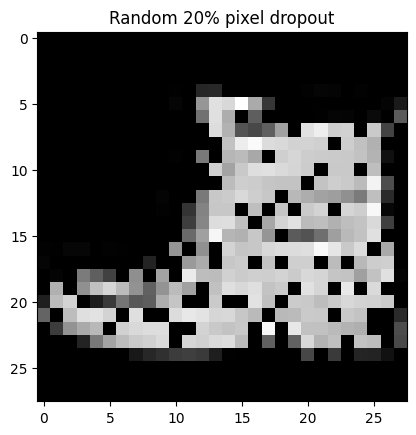

In [ ]:
aug = iaa.Dropout(p=0.2)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Random 20% pixel dropout')

## SaltAndPepper

Text(0.5, 1.0, 'Random 20% pixel dropout')

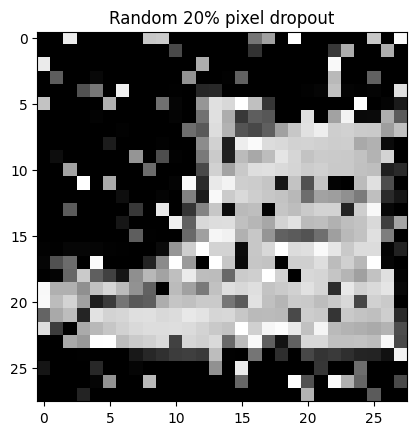

In [ ]:
aug = iaa.SaltAndPepper(0.2)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Random 20% pixel dropout')

# Menambahkan Blur

## Motion Blur

Text(0.5, 1.0, 'Motion Blur with kernel size 5')

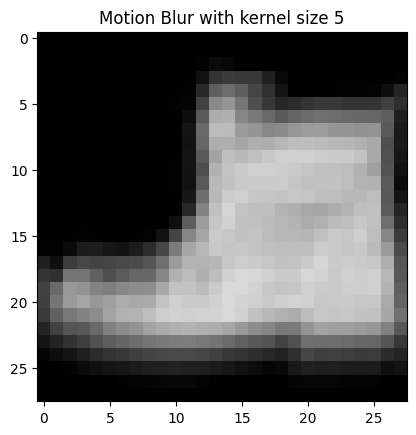

In [ ]:
aug = iaa.MotionBlur(k=5)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Motion Blur with kernel size 5')

## Gaussian Blur

Text(0.5, 1.0, 'Gaussian Blur with sigma=1')

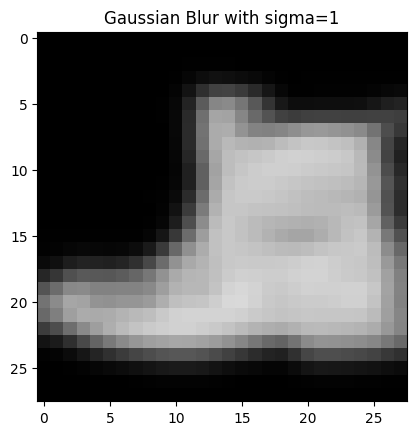

In [ ]:
aug = iaa.GaussianBlur(sigma=1)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Gaussian Blur with sigma=1')

## Median Blur

Text(0.5, 1.0, 'Median Blur with kernel size 3')

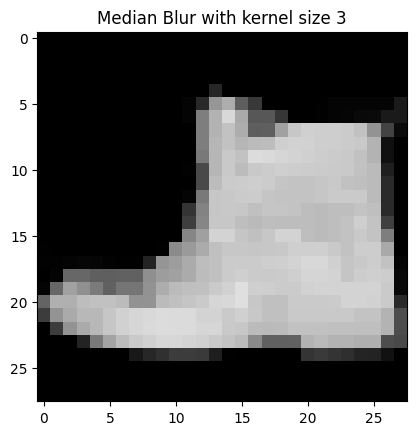

In [ ]:
aug = iaa.MedianBlur(k=3)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Median Blur with kernel size 3')

## Average Blur

Text(0.5, 1.0, 'Average Blur with kernel size 3')

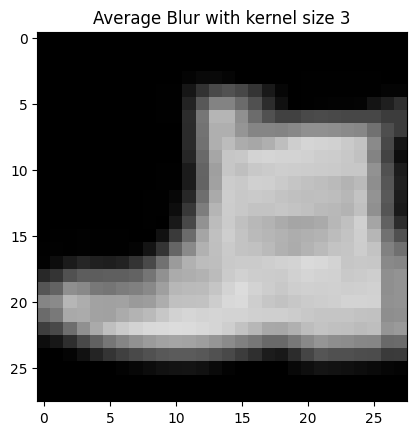

In [ ]:
aug = iaa.AverageBlur(k=3)
plt.imshow(aug.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Average Blur with kernel size 3')

# Kombinasi Augmentasi Gambar

In [ ]:
seq = iaa.Sequential([
    iaa.Dropout(p=0.2),
    iaa.Affine(rotate=(-30, 30))
], random_order=True)

Text(0.5, 1.0, 'Image augmented using a random order of the two augmentations')

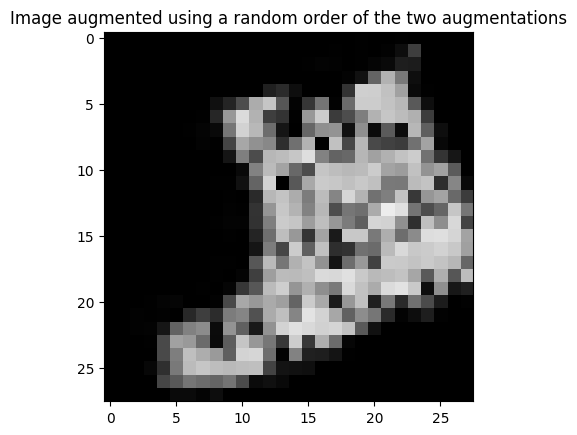

In [ ]:
plt.imshow(seq.augment_image(to_numpy(tr_images[ix])), cmap='gray', vmin=0, vmax=255)
plt.title('Image augmented using a random order of the two augmentations')